<div style="text-align: center; background-color: #bd4f0a; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  ĐẶT VẤN ĐỀ VÀ GIẢI QUYẾT
</div>

### Thông tin nhóm:

<center>

| HỌ TÊN                | MSSV      |
|:------------------    |:--------: |
| Nguyễn Đức Mạnh    | 20120019  |
| Nguyễn Văn Hiến    | 22120101  |
| Đặng Minh Hoàng       | 22120110  |
| Nguyễn Ngọc Hoàng     | 22120112  |
| Quách Tề Hoằng     | 22120114  |

</center>


### Giảng viên hướng dẫn: 
##### **Thầy Lê Nhựt Nam**
##### **Thầy Lê Ngọc Thành**
---

## Nội dung <a id="content"></a>
1. [Chuẩn bị dữ liệu](#reparation) <br>
    1.1 [Khai báo thư viện](#library) <br>
    1.2 [Tải dữ liệu](#load) <br>

2. [Phân khúc khách hàng](#segment)  
    2.1 [Câu hỏi 1](#2-question-1) <br>
    2.2 [Câu hỏi 2](#2-question-2) <br>

3. [Xu hướng thị trường](#trend)  
    3.1 [Câu hỏi 1](#3-question-1) <br>
    3.2 [Câu hỏi 2](#3-question-2) <br>
    
4. [Tiện nghi - Tiện ích](#convenience) <br>
    4.1 [Câu hỏi 1](#4-question-1) <br>
    4.2 [Câu hỏi 2](#4-question-2)<br>
    4.3 [Câu hỏi 3](#4-question-3) <br>

## 1. Chuẩn bị dữ liệu <a id="reparation"></a>
###### [(Về trang đầu)](#content)

### 1.1. Khai báo thư viện <a id="library"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2. Tải dữ liệu <a id="load"></a>

In [ ]:
df = pd.read_csv("./Data/DSPhongTro_DaXuLy.csv", encoding='utf-8-sig', sep='\t')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './DSPhongTro_DaXuLy.csv'

#### Bảng ánh xạ

In [51]:
mapping = {
    1: "Quận 1", 2: "Quận 2", 3: "Quận 3", 4: "Quận 4", 5: "Quận 5", 6: "Quận 6",
    7: "Quận 7", 8: "Quận 8", 9: "Quận 9", 10: "Quận 10", 11: "Quận 11", 12: "Quận 12",
    13: "Bình Thạnh", 14: "Gò Vấp", 15: "Phú Nhuận", 16: "Tân Bình", 17: "Tân Phú",
    18: "Bình Tân", 19: "Thủ Đức", 20: "Bình Chánh", 21: "Cần Giờ",
    22: "Củ Chi", 23: "Hóc Môn", 24: "Nhà Bè"
}
mapping_noi_that = {0: "Không", 1: "Cơ bản", 2: "Đầy đủ", 3: "Cao cấp"}

## 2. Phân khúc khách hàng <a id="segment"></a>

### 2.1. Câu hỏi 1: Ở những khu vực nào tập trung nhiều phòng trọ giá rẻ? Tỷ lệ phòng trọ giá rẻ so với tổng số phòng trọ ở mỗi khu vực đó như thế nào? Và phân bố giá của tất cả các phòng trọ ở các khu vực này ra sao?
###### [(Về trang đầu)](#content)

##### Ý nghĩa của việc trả lời câu hỏi

- Câu hỏi này giúp chúng ta xác định được những khu vực có nhiều lựa chọn cho thuê phòng trọ giá rẻ, từ đó hỗ trợ người thuê nhà tìm kiếm các tùy chọn phù hợp với ngân sách của mình. Đồng thời, phân tích này cũng giúp các chủ nhà hiểu rõ hơn về sự cạnh tranh về giá cả ở từng khu vực.

##### Phân tích hướng xử lí

- Các bước thực hiện:
    + Xác định khái niệm "phòng trọ giá rẻ".
    + Tính toán tỷ lệ phòng trọ giá rẻ.
    + Phân tích phân bố giá.
    + Trực quan hóa kết quả.
- Kết quả mong đợi:
    + Xác định được các khu vực có nhiều phòng trọ giá rẻ và phân bố mức giá ở từng khu vực.

In [ ]:
data_Q1 = df.copy()

# Xác định mức giá rẻ ( dưới 3 triệu đồng/tháng)
gia_re = 3
data_Q1['La_phong_tro_gia_re'] = np.where(data_Q1['Mức giá'] <= gia_re, 1, 0)
data_Q1['Địa chỉ'] = data_Q1['Địa chỉ'].map(mapping)

ty_le_phong_tro_gia_re = data_Q1.groupby('Địa chỉ')['La_phong_tro_gia_re'].mean() * 100

##### Phân tích để trả lời câu hỏi

In [ ]:
# Biểu đồ 1: Tỷ lệ phòng trọ giá rẻ theo khu vực
plt.figure(figsize=(15, 6))
ty_le_phong_tro_gia_re = ty_le_phong_tro_gia_re.sort_values(ascending=False)
sns.barplot(x=ty_le_phong_tro_gia_re.index, y=ty_le_phong_tro_gia_re.values)
plt.title("Tỷ lệ phòng trọ giá rẻ theo khu vực")
plt.xlabel("Khu vực")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=45)
plt.show()

# Biểu đồ 2: Phân bố giá của tất cả các phòng trọ theo khu vực
plt.figure(figsize=(15, 8))
sns.boxplot(x='Địa chỉ', y='Mức giá', data=data_Q1)
plt.title("Phân bố mức giá theo khu vực")
plt.xlabel("Khu vực")
plt.ylabel("Mức giá (triệu đồng)")
plt.xticks(rotation=45)
plt.show()

Từ biều đồ chúng ta có thể thấy:
- Cho thấy rõ sự phân hóa về tỷ lệ phòng trọ giá rẻ giữa các khu vực.
- Các quận ngoại thành thường có tỷ lệ phòng trọ giá rẻ cao hơn so với các quận nội thành.
- Qua biểu đồ boxplot, chúng ta có thể thấy mức giá trung bình, khoảng biến thiên, giá trị ngoại lệ của giá thuê tại mỗi khu vực.
##### Kết luận:
- Xác định các khu vực có nhiều phòng trọ giá rẻ:
    + Các khu vực càng xa nội thành thì tỷ lệ phòng trọ giá rẻ càng cao: Hóc Môn, Nhà Bè, Quận 12, Bình Tân, Thủ Đức là những khu vực có tỷ lệ phòng trọ giá rẻ cao nhất. Điều này được thể hiện rõ ràng trên cả hai biểu đồ. Các khu vực này tập trung đông đảo người lao động phổ thông, công nhân các khu công nghiệp, sinh viên các trường đại học, cao đẳng ở xa trung tâm. Đây là nhóm người có thu nhập trung bình hoặc thấp, nhu cầu tìm kiếm phòng trọ giá rẻ là rất lớn.
    + Các khu vực nội thành: Quận 1, Quận Bình Thạnh, Quận 2 có tỷ lệ phòng trọ giá rẻ thấp nhất. Các quận này đã phát triển từ lâu, mật độ xây dựng rất cao, quỹ đất dành cho xây dựng nhà ở, đặc biệt là các khu nhà trọ bình dân, rất hạn chế. Điều này làm giảm nguồn cung phòng trọ giá rẻ, đẩy giá thuê lên cao.
- Phân bố giá cả:
    + Giá cả trung bình: Các khu vực ngoại thành TP HCM thường có mức giá trung bình thấp hơn so với các khu vực nội thành. Điều này được thể hiện rõ qua biểu đồ boxplot.
    + Có một số điểm dữ liệu nằm xa so với các điểm dữ liệu còn lại (outliers). Điều này cho thấy có một số phòng trọ có giá thuê rất cao hoặc rất thấp so với mặt bằng chung của khu vực. Các điểm dữ liệu ngoại lệ này có thể do nhiều nguyên nhân như: phòng trọ có vị trí đặc biệt đẹp, có tiện ích cao cấp, hoặc ngược lại, phòng trọ có chất lượng kém, vị trí không thuận lợi.
- Kết luận tổng quan:
    + Thị trường cho thuê phòng trọ tại Thành phố Hồ Chí Minh có sự phân hóa rõ rệt giữa các khu vực. Các khu vực ngoại thành thường có nhiều lựa chọn phòng trọ giá rẻ hơn so với các khu vực nội thành. Tuy nhiên, chất lượng và tiện ích của các phòng trọ này cũng có sự khác biệt.

### 2.2 Câu hỏi 2: Tỷ lệ phòng trọ diện tích nhỏ phân bố như thế nào ở từng khu vực? Mức giá trung bình của các phòng trọ diện tích nhỏ thay đổi ra sao giữa các khu vực và so với mức giá trung bình của các phòng trọ có diện tích lớn hơn trong cùng khu vực đó?
###### [(Về trang đầu)](#content)

##### Ý nghĩa của việc trả lời câu hỏi
- Câu hỏi này giúp xác định khu vực nào tập trung nhiều phòng trọ diện tích nhỏ, từ đó hiểu rõ hơn về nhu cầu và nguồn cung loại hình phòng trọ này. Đồng thời, so sánh giá giữa phòng nhỏ và phòng lớn hơn trong cùng khu vực giúp người thuê có cái nhìn tổng quan về thị trường và chủ nhà có chiến lược giá phù hợp.
##### Phân tích hướng xử lí
- Các bước thực hiện:
    + Xác định khái niệm "phòng trọ diện tích nhỏ" (ví dụ: dưới 20m2).
    + Tính tỷ lệ phòng trọ diện tích nhỏ ở mỗi khu vực.
    + Tính mức giá trung bình của phòng trọ diện tích nhỏ và lớn hơn ở mỗi khu vực.
    + Trực quan hóa kết quả bằng biểu đồ.
- Kết quả mong đợi:
    + Xác định được các khu vực có nhiều phòng trọ diện tích nhỏ.
    + Xác định được sự chênh lệch mức giá trung bình của phòng trọ diện tích nhỏ và lớn hơn ở mỗi khu vực.

##### Tiền xử lí

In [ ]:
data_Q2 = df.copy()
data_Q2['Địa chỉ'] = data_Q2['Địa chỉ'].map(mapping)

# Xác định phòng trọ diện tích nhỏ (ví dụ: dưới 20m2)
data_Q2['La_phong_tro_dien_tich_nho'] = (data_Q2['Diện tích'] < 20)

##### Phân tích và trả lời câu hỏi

In [ ]:
#Tính giá trị trung bình theo nhóm
gia_tb_theo_dien_tich = data_Q2.groupby(['Địa chỉ','La_phong_tro_dien_tich_nho'])['Mức giá'].mean().unstack()
ty_le_phong_tro_S_nho= data_Q2.groupby('Địa chỉ')['La_phong_tro_dien_tich_nho'].mean() * 100
ty_le_phong_tro_S_nho = ty_le_phong_tro_S_nho.sort_values(ascending=False)

# Biểu đồ 1: Tỷ lệ phòng trọ diện tích nhỏ theo khu vực
plt.figure(figsize=(15, 6))
ty_le_phong_tro_S_nho
sns.barplot(x=ty_le_phong_tro_S_nho.index, y=ty_le_phong_tro_S_nho.values, color='skyblue')
plt.title("Tỷ lệ phòng trọ diện tích nhỏ theo khu vực")
plt.xlabel("Khu vực")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=45, ha='right')
plt.show()

#Biểu đồ 2: So sánh mức giá trung bình của phòng trọ diện tích nhỏ và lớn theo khu vực
gia_tb_theo_dien_tich.plot(kind='bar', figsize=(15,6))
plt.title("So sánh mức giá trung bình của phòng trọ theo diện tích và khu vực")
plt.xlabel("Khu vực")
plt.ylabel("Mức giá (triệu đồng)")
plt.xticks(rotation=45, ha='right')
plt.legend(['Lớn hơn 20m2','Nhỏ hơn 20m2']) 
plt.show()

Từ biều đồ 1 chúng ta có thể thấy tỷ lệ phòng trọ diện tích nhỏ phân bố theo khu vực:
- Các khu vực Nhà Bè, Thủ Đức , quận 5 và quận 6 có tỷ lệ phòng trọ diện tích nhỏ cao hơn hẳn so với các khu vực khác vì:
    + Thành phố Thủ Đức và Nhà Bè: Phần lớn người thuê trọ ở đây là sinh viên, công nhân, người lao động có thu nhập thấp, ưu tiên thuê phòng có dện tích nhỏ giá rẻ. Nhu cầu thuê trọ giá rẻ, gần nơi làm việc tăng cao, dẫn đến việc các chủ nhà trọ tận dụng tối đa diện tích để xây dựng nhiều phòng, thu lợi nhuận.

    + Quận 5 và Quận 6: Đây là hai quận có lịch sử lâu đời, tập trung đông người Hoa sinh sống. Kiến trúc nhà ở ở đây thường là các nhà phố kiểu cũ, được chia nhỏ để cho thuê, tạo thành các phòng trọ có diện tích hạn chế.
- Những khu vực nội thành như Quận 2, Quận 4, Bình Thạnh, Tân Bình và Tân Phú có tỷ lệ phòng trọ diện tích nhỏ thấp bởi vì đây là các khu vực Vị trí trung tâm hoặc gần trung tâm, bên cạnh nhà trọ các quận này còn có nhiều loại hình nhà ở khác như căn hộ chung cư, nhà nguyên căn, nhà cho thuê nguyên căn... điều này tạo ra sự cạnh tranh và người thuê có nhiều sự lựa chọn hơn, ít bị phụ thuộc vào các phòng trọ nhỏ. Và điều này cũng phản ánh xu hướng các phòng trọ tại đây thường có diện tích lớn hơn do giá thuê mặt bằng cao khiến chủ nhà ưu tiên xây dựng phòng lớn hơn hoặc cho thuê mặt bằng kinh doanh.


Từ biểu đồ 2 ta có thể thấy:
- Tương tự như phòng trọ có diện tích nhỏ, đối với phòng trọ có diện tích lớn các vùng ven và ngoại thành thường có giá thấp hơn khu vực nội thành.
- Giá trung bình của phòng nhỏ chỉ bằng 50% đến 60% với phòng vừa và lớn. Thay vì thuê phòng trọ nhỏ thì ta có thể thuê phòng trọ lớn tìm kiếm bạn phòng rồi chia tiền thì sẽ tiết kiệm được chi phí lại còn có thể có một môi trường, cơ sở vật chất tốt hơn.

#### Kết luận

Qua phân tích dữ liệu, chúng ta thấy rõ sự phân hóa về tỷ lệ phòng trọ diện tích nhỏ giữa các khu vực tại Thành phố Hồ Chí Minh. Các khu vực ngoại thành và một số quận nội thành có lịch sử lâu đời thường có tỷ lệ phòng trọ diện tích nhỏ cao hơn. Điều này có thể giải thích bởi các yếu tố như:
- Quy hoạch đô thị: Các khu vực ngoại thành và các quận có lịch sử lâu đời thường chưa có quy hoạch đô thị đồng bộ, dẫn đến việc xây dựng các phòng trọ nhỏ lẻ, tự phát.
- Giá cả mặt bằng: Ở các khu vực trung tâm, giá thuê mặt bằng cao nên các chủ nhà thường ưu tiên xây dựng các phòng trọ có diện tích lớn hơn để tối ưu hóa lợi nhuận.
- Nhu cầu của người thuê: Ở các khu vực ngoại thành, người thuê thường có nhu cầu thuê phòng trọ với chi phí thấp, vì vậy phòng trọ diện tích nhỏ đáp ứng được nhu cầu này.

Ngoài ra chúng ta cũng thấy được sự chênh lệch giữa trung bình giá phòng nhỏ và phòng lớn giữa các khu vực. Điều này giúp người thuê có được sự lựa chọn tối ưu nhất có thể.

## 3. Xu hướng thị trường <a id="trend"></a>

### 3.1. Câu hỏi 1 <a id="3-question-1"></a>
###### [(Về trang đầu)](#content)

### 3.2. Câu hỏi 2   <a id="3-question-2"></a>
###### [(Về trang đầu)](#content)

## 4. Tiện nghi - Tiện ích <a id="convenience"></a>

### 4.1. Câu hỏi 1: Khu vực nào phòng trọ có sẵn nội thất nhiều?   <a id="4-question-1"></a>
###### [(Về trang đầu)](#content)

#### Bước 1: Nhóm các phòng trọ theo khu vực (Địa chỉ) và tính tổng giá trị cột Nội thất cho mỗi khu vực

In [52]:
noi_that_theo_khu_vuc = df.groupby('Địa chỉ')['Nội thất'].sum()
noi_that_theo_khu_vuc

Địa chỉ
1     411
2     698
3     353
4     105
5     138
6      82
7     585
8     204
9      92
10    317
11     44
12    152
13    963
14    467
15    346
16    646
17    328
18    171
19    155
20    104
23     15
24     42
Name: Nội thất, dtype: int64

#### Bước 2: Sắp xếp các khu vực theo tổng giá trị Nội thất theo thứ tự giảm dần

In [53]:
noi_that_theo_khu_vuc_sorted = noi_that_theo_khu_vuc.sort_values(ascending=False)
noi_that_theo_khu_vuc_sorted

Địa chỉ
13    963
2     698
16    646
7     585
14    467
1     411
3     353
15    346
17    328
10    317
8     204
18    171
19    155
12    152
5     138
4     105
20    104
9      92
6      82
11     44
24     42
23     15
Name: Nội thất, dtype: int64

### Bước 3: Xác định khu vực đứng đầu danh sách

In [54]:
khu_vuc_nhieu_noi_that_nhat = noi_that_theo_khu_vuc_sorted.index[0]
print("Khu vực có nhiều phòng trọ có sẵn nội thất nhất:",mapping[khu_vuc_nhieu_noi_that_nhat])

Khu vực có nhiều phòng trọ có sẵn nội thất nhất: Bình Thạnh


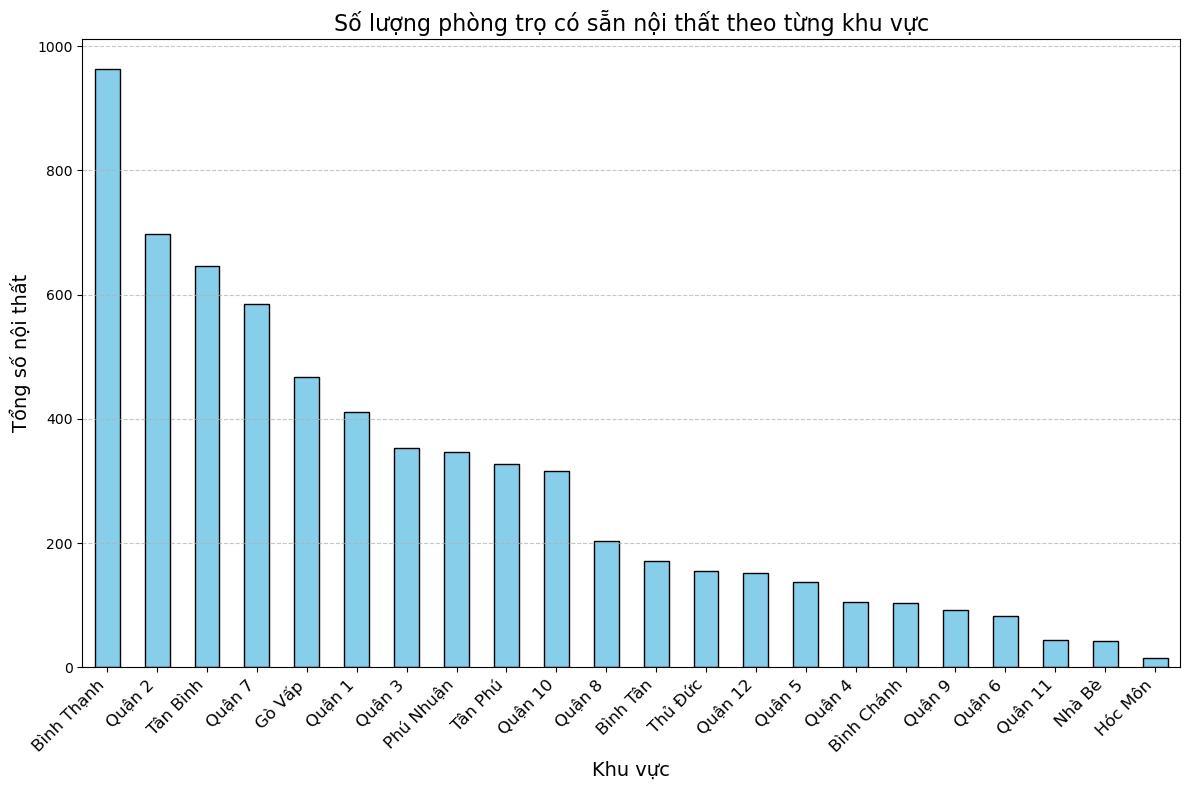

In [55]:
noi_that_theo_khu_vuc_sorted_named = noi_that_theo_khu_vuc_sorted.rename(index=mapping)

# Plot the bar chart
plt.figure(figsize=(12, 8))
noi_that_theo_khu_vuc_sorted_named.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Số lượng phòng trọ có sẵn nội thất theo từng khu vực", fontsize=16)
plt.xlabel("Khu vực", fontsize=14)
plt.ylabel("Tổng số nội thất", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#### Phân tích số lượng phòng trọ có sẵn nội thất theo khu vực tại TP.HCM

##### Tổng quan
- Biểu đồ thể hiện số lượng phòng trọ có sẵn nội thất phân bố theo các quận/huyện tại TP.HCM
- Dữ liệu được biểu diễn dưới dạng biểu đồ cột, sắp xếp theo thứ tự giảm dần

##### Các điểm chính

1. Phân bố không đồng đều:
- Bình Thạnh dẫn đầu với khoảng 950 phòng trọ có nội thất
- Top 3 khu vực có nhiều phòng trọ nhất: Bình Thạnh, Quận 2, Tân Bình
- Các khu vực có ít phòng trọ nhất: Hóc Môn, Nhà Bè, Quận 11 (<100 phòng)

2. Phân nhóm khu vực:
- Nhóm cao (>600): Bình Thạnh, Quận 2, Tân Bình
- Nhóm trung bình (300-600): Quận 7, Gò Vấp, Quận 1, Quận 3, Phú Nhuận
- Nhóm thấp (<300): Các quận/huyện còn lại

3. Xu hướng:
- Các quận trung tâm và các quận phát triển mới có số lượng phòng trọ cao
- Các quận/huyện ngoại thành có số lượng phòng trọ thấp hơn đáng kể

##### Ý nghĩa

1. Cung cầu:
- Phản ánh nhu cầu nhà ở tại các khu vực trung tâm và phát triển mới
- Cho thấy xu hướng đầu tư căn hộ dịch vụ tập trung tại các khu vực phát triển

2. Quy hoạch:
- Thể hiện sự phát triển không đồng đều giữa các khu vực
- Cơ hội phát triển cho các khu vực có số lượng thấp

### 4.2. Câu hỏi 2: Số lượng phòng nhóm theo nội thất phân bố như thế nào?  <a id="4-question-2"></a>
###### [(Về trang đầu)](#content)

#### Bước 1: Đếm số lượng phòng theo từng loại nội thất.

In [56]:
df['Nội thất (Mô tả)'] = df['Nội thất'].map(mapping_noi_that)

so_luong_theo_noi_that = df['Nội thất (Mô tả)'].value_counts()
so_luong_theo_noi_that

Nội thất (Mô tả)
Đầy đủ     2906
Không      1120
Cơ bản      558
Cao cấp      16
Name: count, dtype: int64

#### Bước 2: Vẽ biểu đồ trực quan

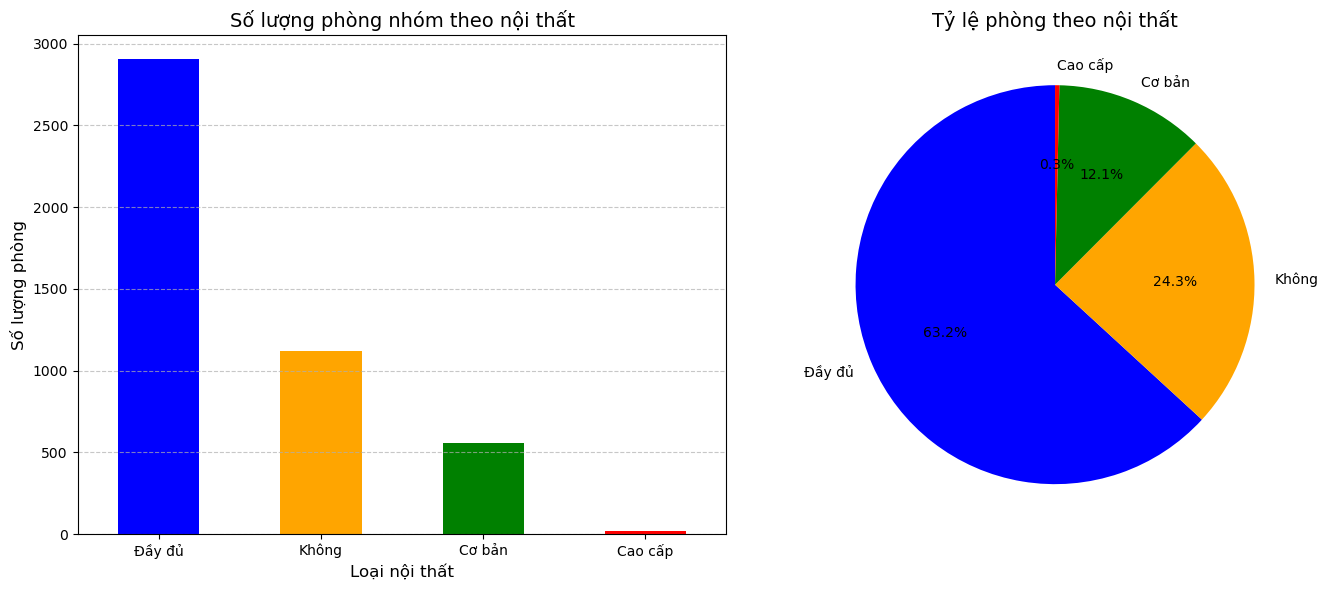

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

so_luong_theo_noi_that.plot(
    kind='bar', 
    color=['blue', 'orange', 'green', 'red'], 
    ax=axes[0]
)
axes[0].set_title("Số lượng phòng nhóm theo nội thất", fontsize=14)
axes[0].set_xlabel("Loại nội thất", fontsize=12)
axes[0].set_ylabel("Số lượng phòng", fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

so_luong_theo_noi_that.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['blue', 'orange', 'green', 'red'], 
    startangle=90, 
    ax=axes[1]
)
axes[1].set_title("Tỷ lệ phòng theo nội thất", fontsize=14)
axes[1].set_ylabel("")  

plt.tight_layout()

plt.show()

#### Phân tích số lượng và tỷ lệ phòng trọ theo mức độ nội thất tại TP.HCM

##### Tổng quan
- Dữ liệu được thể hiện qua 2 biểu đồ: biểu đồ cột về số lượng và biểu đồ tròn về tỷ lệ
- Phân loại nội thất thành 4 mức độ: đầy đủ, không có, cơ bản, và cao cấp

##### Phân tích

1. Số lượng phòng theo nội thất:
- Phòng có nội thất đầy đủ: khoảng 2,900 phòng (chiếm 63.2%)
- Phòng không có nội thất: khoảng 1,100 phòng (chiếm 24.3%)
- Phòng có nội thất cơ bản: khoảng 550 phòng (chiếm 12.1%)
- Phòng có nội thất cao cấp: số lượng rất ít (chiếm 0.3%)

2. Xu hướng thị trường:
- Đa số phòng trọ (>60%) được trang bị nội thất đầy đủ
- Gần 1/4 số phòng không có nội thất, cho thấy vẫn có nhu cầu về phòng trống
- Phân khúc cao cấp chiếm tỷ lệ nhỏ, phản ánh thị trường chủ yếu phục vụ phân khúc bình dân

##### Nhận xét

1. Về thị hiếu:
- Người thuê ưa chuộng phòng có nội thất đầy đủ
- Thị trường phòng trọ cao cấp còn khá hạn chế
- Vẫn tồn tại nhu cầu về phòng không nội thất (có thể do giá rẻ hơn)

2. Về đầu tư:
- Chủ đầu tư có xu hướng trang bị nội thất đầy đủ để tăng khả năng cho thuê
- Phân khúc cao cấp còn nhiều dư địa phát triển

### 4.3. Câu hỏi 3: Phần trăm số lượng phòng có từ 2 phòng ngủ?   <a id="4-question-3"></a>
###### [(Về trang đầu)](#content)

#### Bước 1: Đếm số lượng phòng trọ có `Số phòng ngủ >= 2`

In [58]:
so_phong_tu_2_phong_ngu = df[df['Số phòng ngủ'] >= 2].shape[0]
print("Số lượng phòng trọ có từ 2 phòng ngủ trở lên:", so_phong_tu_2_phong_ngu)

Số lượng phòng trọ có từ 2 phòng ngủ trở lên: 164


#### Bước 2: Tính tổng số lượng phòng trọ

In [59]:
tong_so_phong_tro = df.shape[0]
print("Tổng số lượng phòng trọ:", tong_so_phong_tro)

Tổng số lượng phòng trọ: 4600


#### Bước 3: Tính tỷ lệ phần trăm

In [60]:
phan_tram = (so_phong_tu_2_phong_ngu / tong_so_phong_tro) * 100
print(f"Phần trăm số lượng phòng có từ 2 phòng ngủ: {phan_tram:.2f}%")

Phần trăm số lượng phòng có từ 2 phòng ngủ: 3.57%


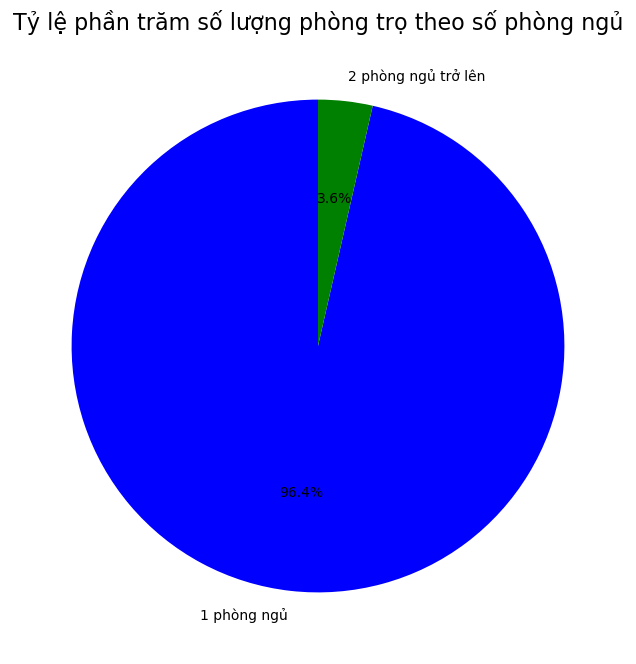

In [61]:
so_phong_tro_1 = df[df['Số phòng ngủ'] == 1].shape[0]
so_phong_tro_2_or_more = df[df['Số phòng ngủ'] >= 2].shape[0]

labels = ['1 phòng ngủ', '2 phòng ngủ trở lên']
values = [so_phong_tro_1, so_phong_tro_2_or_more]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])

plt.title("Tỷ lệ phần trăm số lượng phòng trọ theo số phòng ngủ", fontsize=16)

plt.show()

#### Trả lời
Phần trăm số lượng phòng có từ 2 phòng ngủ là `3.6%`, các phòng còn lại đều chỉ có `1` phòng ngủ, ta tiến hành phân tích xem các khu vực nào chứa nhiều phòng có từ 2 phòng ngủ trở lên

#### Phân tích: Các phòng có từ 2 phòng ngủ trở lên tập trung ở khu vực nào?

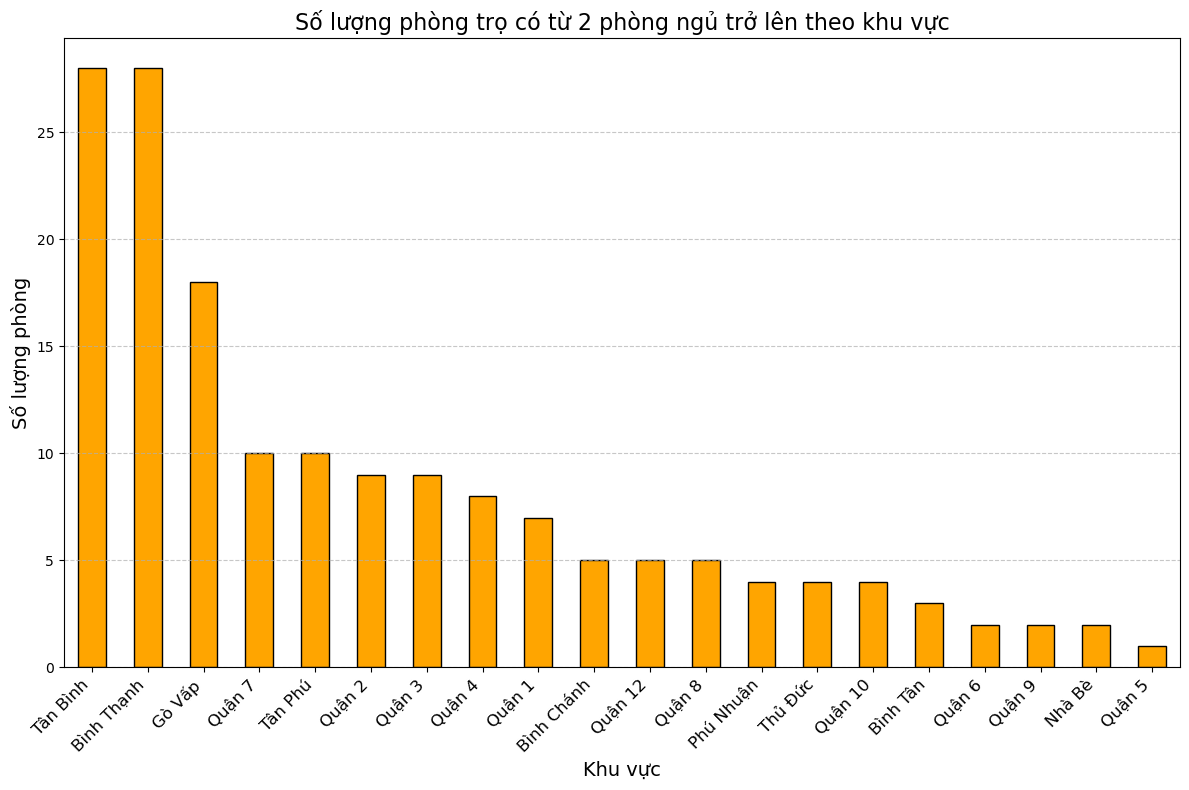

In [62]:
phong_tro_tu_2_phong_ngu = df[df['Số phòng ngủ'] >= 2]
phong_tro_theo_khu_vuc = phong_tro_tu_2_phong_ngu.groupby('Địa chỉ').size()
phong_tro_theo_khu_vuc_sorted = phong_tro_theo_khu_vuc.sort_values(ascending=False)
phong_tro_theo_khu_vuc_sorted_named = phong_tro_theo_khu_vuc_sorted.rename(index=mapping)
plt.figure(figsize=(12, 8))
phong_tro_theo_khu_vuc_sorted_named.plot(kind='bar', color='orange', edgecolor='black')

plt.title("Số lượng phòng trọ có từ 2 phòng ngủ trở lên theo khu vực", fontsize=16)
plt.xlabel("Khu vực", fontsize=14)
plt.ylabel("Số lượng phòng", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



#### Phân tích số lượng phòng trọ từ 2 phòng ngủ trở lên theo khu vực tại TP.HCM

##### Phân bố địa lý
- Khu vực có nhiều phòng trọ nhất là Tân Bình và Bình Thạnh (khoảng 28 phòng mỗi quận)
- Top 3 khu vực dẫn đầu bao gồm: Tân Bình, Bình Thạnh và Gò Vấp (17-28 phòng)
- Các quận trung tâm như Quận 1, Quận 3 có số lượng phòng trọ ở mức trung bình (7-9 phòng)
- Các quận ngoại thành như Quận 9, Nhà Bè có ít phòng trọ nhất (2-3 phòng)

##### Phân tích
1. Tập trung cao ở khu vực phát triển:
   - Các quận có nhiều phòng trọ thường là những khu vực phát triển sớm, gần trung tâm
   - Có hệ thống hạ tầng và tiện ích đầy đủ
   
2. Phân bố không đồng đều:
   - Chênh lệch rõ rệt giữa các khu vực (28 phòng vs 1 phòng)
   - Khoảng 60% tổng số phòng trọ tập trung ở 5 quận đầu tiên

3. Tiềm năng phát triển:
   - Các quận có số lượng phòng trọ thấp có thể là cơ hội đầu tư trong tương lai
   - Đặc biệt là các khu vực đang phát triển như Quận 9, Nhà Bè
